In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [14]:
# 2. Load the iris dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 3. Explore the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
# 4. Shape and type of 'data'
print('shape:', iris['data'].shape)
print('\ntype:', iris['data'].dtype)

shape: (150, 4)

type: float64


In [22]:
# 5. Store 'data' and 'feature_names' in distinct variables
data = iris['data']
features_names = iris['feature_names']

In [23]:
# 6. Create a pandas dataframe with 'data' and use 'feature_names' for column names
data_df = pd.DataFrame(data, columns=features_names)
data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# 7. Get the summary statistics for this dataframe
data_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
# 8. Subset the dataframe to keep only the first 50 rows
data_df = data_df.iloc[:50, :]
data_df.shape

(50, 4)

In [41]:
# 9. Are there any extreme sepal length values
# sepal_length_mean = data_df['sepal length (cm)'].mean()
sepal_length_std = data_df['sepal length (cm)'].std()
extreme_values = []
for value in data_df['sepal length (cm)']:
    if value > 3.9 *  sepal_length_std: # (value - sepal_length_mean) / sepal_length_std > 3.9:
        extreme_values.append(value)
print('{} extremes values:'.format(len(extreme_values)), extreme_values)

50 extremes values: [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0]


In [77]:
# 10. Automating the previous operation with a function
def find_extreme_values(data_df_col):
    col_mean = data_df_col.mean()
    col_std = data_df_col.std()
    extreme_values = []
    for value in data_df_col:
        if value > 3.9 * col_std: # (value - col_mean) / col_std > 3.9:
            extreme_values.append(value)
    return(extreme_values)

for feature in data_df:
    extreme_values = find_extreme_values(data_df[feature])
    print('for feature ' + feature + ', there are {} extremes values:'.format(len(extreme_values)), extreme_values)
    print('')

for feature sepal length (cm), there are 50 extremes values: [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0]

for feature sepal width (cm), there are 50 extremes values: [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3]

for feature petal length (cm), there are 50 extremes values: [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4]

for feature petal width (cm), there are 2 extremes values: [0.

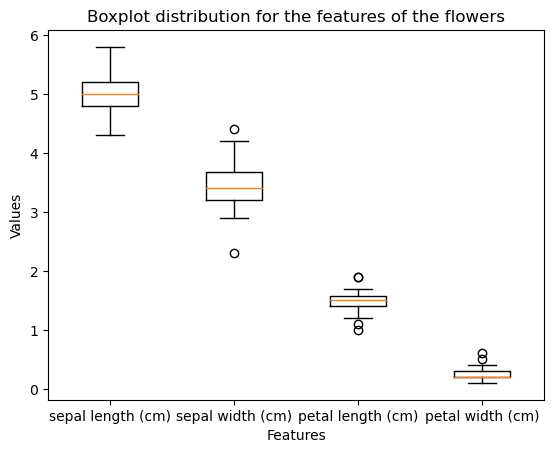

In [72]:
# 11-12. Boxplot function in matplotlib with a title and name for axis

# Documentation:
# Draw a box and whisker plot.
# The box extends from the first quartile (Q1) to the third quartile (Q3) of the data,
# with a line at the median. 
# The whiskers extend from the box by 1.5x the inter-quartile range (IQR). 
# Flier points are those past the end of the whiskers.

features_data = [data_df[feature].to_numpy() for feature in data_df]
features = [feature for feature in data_df]

fig = plt.figure('flowers_features_distribution')

plt.boxplot(features_data, labels=features)

plt.title('Boxplot distribution for the features of the flowers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [74]:
# 13. Save dataframe in csv format and the plot as png
data_df.to_csv('flowers_features.csv')
plt.savefig('flowers_features_distribution.png')

<Figure size 640x480 with 0 Axes>